In [69]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [71]:
files=['img_0.033.jpg','img_0.25.jpg','img_2.5.jpg','img_15.jpg']
img_list=[]
for image in files:
    im=cv2.imread(image,1)
    im_cvt=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    img_list.append(im_cvt)
time=np.array([1/30.0,0.25,2.5,15.0],dtype=np.float32)

In [73]:
alignMTB=cv2.createAlignMTB()
alignMTB.process(img_list,img_list)

In [75]:
caliberate_debevec=cv2.createCalibrateDebevec()
response=caliberate_debevec.process(img_list,time)

In [77]:
merge=cv2.createMergeDebevec()
merged_img=merge.process(img_list,time,response)

In [83]:
tonne=cv2.createTonemapDrago(1.0,0.7)
i=tonne.process(merged_img)
tonned_img=3*i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


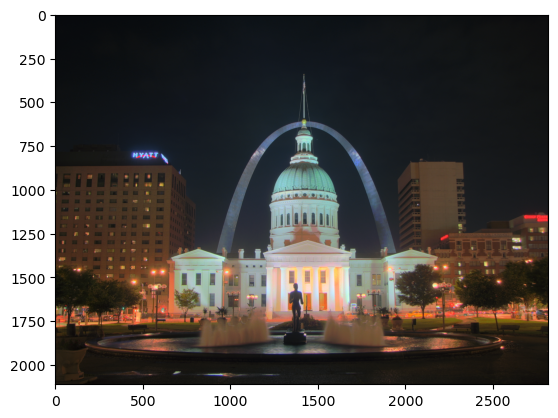

In [85]:
plt.imshow(tonned_img)

In [97]:
cv2.imwrite("HDR_2.jpg",255*tonned_img[:,:,::-1])

True